## Load packages

In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Load extracted feature data set

In [51]:
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'Unet-2-dog-w-augment-2021-07-25/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "uncompressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 3139)


,0,1,2,3,4,5,6,7,8,9,...,3129,3130,3131,3132,3133,3134,3135,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,0.0,3.909721,0.000000,5.583603,0.0,5.476412,0.0,1,563.673469
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,2.172515,0.000000,0.0,15.297228,2.0,1,621.235078
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.0,0.284720,0.000000,0.000000,0.0,5.846832,4.0,1,644.143823
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,9.453906,7.0,1,539.266118
-01-CON-D09-L.png,0.000000,9.426241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,10.841634,9.0,1,473.401923


In [52]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \
        wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
#print(feature_data)

## Read the clinical file for days until heal data

In [54]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  711.840000         1.000000   
-05-CON-D04-L.png            4.0          5  659.363853         0.926281   
-05-CON-D07-L.png            7.0          5  494.384766         0.694517   
-05-CON-D09-L.png            9.0          5  232.888889         0.327165   
-05-CON-D11-L.png           11.0          5  117.528889         0.165106   
-05-CON-D14-L.png           14.0          5   50.813802         0.071384   
-05-CON-D16-L.png           16.0          5   30.040816         0.042202   
-05-CON-D18-L.png           18.0          5   21.973333         0.030868   
-05-CON-D21-L.png           21.0          5    8.742756         0.012282   
-05-CON-D23-L.png           23.0          5    4.128086         0.005799   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


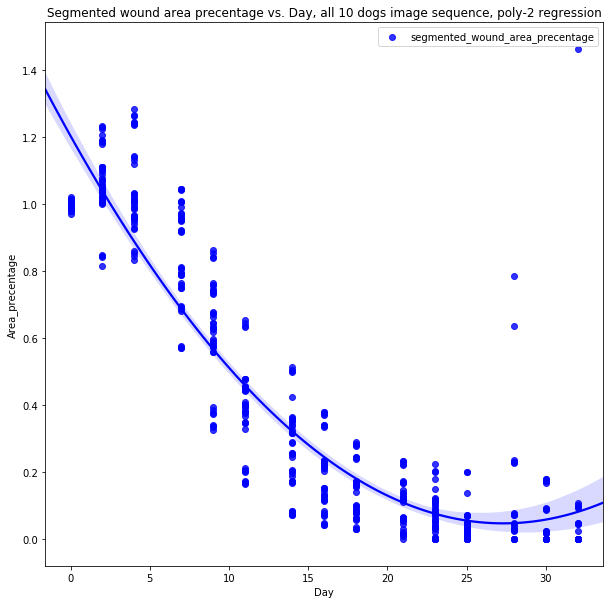

In [56]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

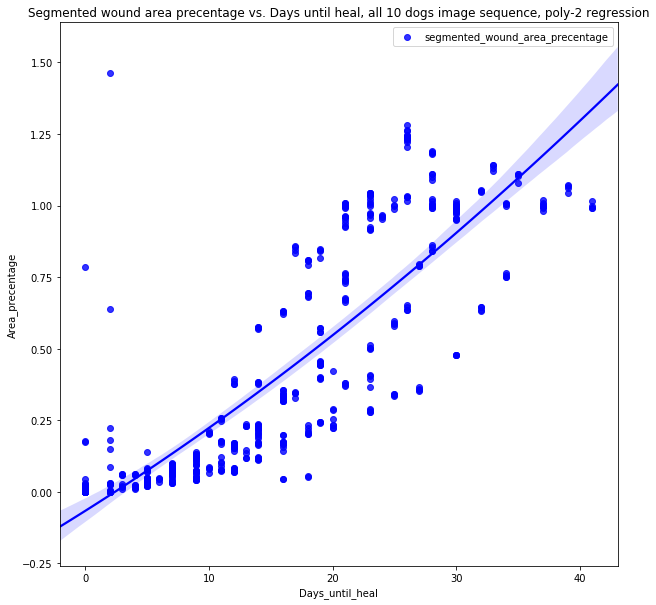

In [57]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [58]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9,10]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9, 10]


In [59]:
feature_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,3130,3131,3132,3133,3134,3135,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,3.909721,0.000000,5.583603,0.0,5.476412,0.0,1,563.673469,1.000000
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,2.172515,0.000000,0.0,15.297228,2.0,1,621.235078,1.102119
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.284720,0.000000,0.000000,0.0,5.846832,4.0,1,644.143823,1.142761
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,9.453906,7.0,1,539.266118,0.956699


### Part 1
Train the GPR on the 1-8 dog wound image sequence

In [60]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
#print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 3138)
The test wound image sequence's days:
 -09-CON-D00-R.png              0.0
-09-CON-D02-R.png              2.0
-09-CON-D04-R.png              4.0
-09-CON-D07-R.png              7.0
-09-CON-D09-R.png              9.0
-09-CON-D11-R.png             11.0
-09-CON-D14-R.png             14.0
-09-CON-D16-R.png             16.0
-09-CON-D18-R.png             18.0
-09-CON-D21-R.png             21.0
-09-CON-D23-R.png             23.0
-09-CON-D25-R.png             25.0
-09-CON-D28-R.png             28.0
-09-CON-D30-R.png             30.0
-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotat

In [61]:
X_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,3128,3129,3130,3131,3132,3133,3134,3135,Area_mm2,Area_precentage
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,0.0,0.0,3.909721,0.000000,5.583603,0.0,5.476412,563.673469,1.000000
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,2.172515,0.000000,0.0,15.297228,621.235078,1.102119
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.284720,0.000000,0.000000,0.0,5.846832,644.143823,1.142761
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,9.453906,539.266118,0.956699


### Part 2
Train the GPR on all dog wound image sequences' (1 - 10) day 1-15 sequences.
Predict all all dog wound image sequences' (1 - 10) day 16-32 sequences.

In [62]:
# 2. use the < 16 days image sequence as training input and > 16 days image sequence as test input
# Train
#X_train = feature_data[feature_data['Day'].isin(range(0,16))]
#X_train = X_train.drop(['Dog_label','Area_mm2'], axis = 1)

#X_test = feature_data[feature_data['Day'].isin(range(16,35))]
#X_test = X_test[X_test['Dog_label'].isin([test_num])]

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
#X_test = X_test.drop(['Dog_label','Area_mm2'], axis = 1)
# Label
#Y_train = wound_area_df[wound_area_df['Day'].isin(range(0,16))]
#Y_train = Y_train['Area_precentage']

#Y_test = wound_area_df[wound_area_df['Day'].isin(range(16, 35))]
#Y_test = Y_test[Y_test['Dog_label'].isin([test_num])]

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
#Y_test = Y_test['Area_precentage']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 or 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
#print("The test wound image sequence's days:\n", days_seq)

## Gaussian Process Regressor
Define the GaussianProcessRegressor object.

### Grid search for GP regressor

In [63]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct,WhiteKernel,RationalQuadratic,ExpSineSquared
from sklearn.model_selection import GridSearchCV

# Kernel with parameters given in GPML book
#k1 = ConstantKernel(constant_value=66.0**2) * RBF(length_scale=67.0)  # long term smooth rising trend
#k2 = ConstantKernel(constant_value=2.4**2) * RBF(length_scale=90.0) \
#    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
#k3 = ConstantKernel(constant_value=0.66**2) \
#    * RationalQuadratic(length_scale=1.2, alpha=0.78)
#k4 = ConstantKernel(constant_value=0.18**2) * RBF(length_scale=0.134) \
#    + WhiteKernel(noise_level=0.19**2)  # noise terms
#kernel_gpml = k1 + k2 + k3 + k4
#gp = GaussianProcessRegressor(kernel=kernel_gpml)

#param_grid = {'alpha': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k1__constant_value': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k2__length_scale': np.logspace(-2, 2, 5),
#              'kernel__k2__k2__noise_level':np.logspace(-2, 1, 5)
#              }


param_grid = [{
    "alpha":  [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, num = 20)]
}, {
    "alpha":  [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, num = 20)]
}]
gp = GaussianProcessRegressor(random_state = r_seed)

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=10)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'alpha': 1e-10, 'optimizer': 'fmin_l_bfgs_b', 'n_restarts_optimizer': 0, 'random_state': 42, 'normalize_y': False, 'copy_X_train': True, 'kernel': None}
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] alpha=1.0, kernel=RBF(length_scale=0.1) .........................
[CV] alpha=1.0, kernel=RBF(length_scale=0.1) .........................
[CV] alpha=1.0, kernel=RBF(length_scale=0.1) .........................
[CV] alpha=1.0, kernel=RBF(length_scale=0.1) .........................
[CV] alpha=1.0, kernel=RBF(length_scale=0.1) .........................
[CV] alpha=1.0, kernel=RBF(length_scale=0.127) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.127) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.1), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1.0, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.1), score=-3

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s


[CV]  alpha=1.0, kernel=RBF(length_scale=0.127), score=-2.2549228560986854, total=   1.4s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.1), score=-2.2720019602195793, total=   1.8s
[CV] alpha=1.0, kernel=RBF(length_scale=0.162) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.162) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.127), score=-2.285383829146269, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=0.162) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.127), score=-3.4498628466930814, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=0.207) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.127), score=-2.383513777412045, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=0.207) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.162), score=-2.2549228560986854, total=   1.5s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.127), score=-2.2720019602195793, total=   1.8s


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.5s


[CV]  alpha=1.0, kernel=RBF(length_scale=0.162), score=-3.4498628466930814, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=0.207) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.207) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.207) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.207), score=-2.2549228560986854, total=   1.1s
[CV] alpha=1.0, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.162), score=-2.285383829146269, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.162), score=-2.2720019602195793, total=   1.6s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.162), score=-2.383513777412045, total=   1.4s
[CV] alpha=1.0, kernel=RBF(length_scale=0.264) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.264) .......................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.2s


[CV]  alpha=1.0, kernel=RBF(length_scale=0.207), score=-3.4498628466930814, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.207), score=-2.383513777412045, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.336) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.207), score=-2.2720019602195793, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.336) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.264), score=-3.4498628466930814, total=   1.7s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.207), score=-2.285383829146269, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.336) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.336) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.264), score=-2.2720019602195793, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=0.336) .......................
[CV]  alpha=1.0, kernel=RBF(length_s

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s


[CV]  alpha=1.0, kernel=RBF(length_scale=0.336), score=-3.4498628466930814, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.428) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.336), score=-2.285383829146269, total=   1.4s
[CV] alpha=1.0, kernel=RBF(length_scale=0.428) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.336), score=-2.2549228560986854, total=   1.9s
[CV] alpha=1.0, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.336), score=-2.383513777412045, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.336), score=-2.2720019602195793, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.428), score=-3.4498628466930814, total=   1.5s
[CV] alpha=1.0, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=1.0, kernel=RBF(length_s

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.2s


[CV] alpha=1.0, kernel=RBF(length_scale=0.695) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.546), score=-3.4498628466930814, total=   1.5s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.546), score=-2.2720019602195793, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=0.886) .......................
[CV] alpha=1.0, kernel=RBF(length_scale=0.886) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.546), score=-2.383513777412045, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=0.886) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.695), score=-2.2549228560986854, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=0.886) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.695), score=-2.2720019602195793, total=   1.2s
[CV] alpha=1.0, kernel=RBF(length_scale=0.886) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.695), score=-3.4498628466930814, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_s

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.3s


[CV]  alpha=1.0, kernel=RBF(length_scale=0.695), score=-2.285383829146269, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=1.13) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.886), score=-2.285383829146269, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=0.886), score=-2.2720019602195793, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.13), score=-2.2549228560986854, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.13), score=-2.2720019602195793, total=   1.2s
[CV]  alpha=1.0, kernel=RBF(length_scale=0.886), score=-2.383513777412045, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.13), score=-3.4498628466930814, total=   1.4s
[CV] alpha=1.0, kerne

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.6s


[CV]  alpha=1.0, kernel=RBF(length_scale=1.44), score=-3.4498628466930814, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=1.83) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.83), score=-2.2549228560986854, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=2.34) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.44), score=-2.383513777412045, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=2.34) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.83), score=-3.4498628466930814, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=2.34) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.44), score=-2.285383829146269, total=   1.7s
[CV] alpha=1.0, kernel=RBF(length_scale=2.34) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.83), score=-2.285383829146269, total=   1.4s
[CV] alpha=1.0, kernel=RBF(length_scale=2.34) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=1.

[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   26.0s


[CV]  alpha=1.0, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   2.1s
[CV] alpha=1.0, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=2.98), score=-2.2549228560986854, total=   1.8s
[CV] alpha=1.0, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=2.34), score=-2.2720019602195793, total=   1.8s
[CV] alpha=1.0, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=2.98), score=-2.285383829146269, total=   1.6s
[CV] alpha=1.0, kernel=RBF(length_scale=4.83) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=2.98), score=-2.2720019602195793, total=   1.2s
[CV] alpha=1.0, kernel=RBF(length_scale=4.83) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=3.79), score=-2.2549228560986854, total=   1.3s
[CV] alpha=1.0, kernel=RBF(length_scale=4.83) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=3

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   31.6s


[CV] alpha=1.0, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=4.83), score=-2.2720019590204146, total=   2.0s
[CV] alpha=1.0, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=4.83), score=-2.3835137774120443, total=   2.2s
[CV] alpha=1.0, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=6.16), score=-2.285382296004575, total=   2.3s
[CV] alpha=1.0, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=6.16), score=-2.272000495121663, total=   2.2s
[CV] alpha=1.0, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=1.0, kernel=RBF(length_scale=6.16), score=0.7046121463011363, total=   8.3s
[CV] alpha=1.0, kernel=RBF(length_scale=10) ..........................
[CV]  alpha=1.0, kernel=RBF(length_scale=6.16), score=0.8407027242179272, total=   9.1s
[CV] alpha=1.0, kernel=RBF(length_scale=10) 

[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   46.0s


[CV]  alpha=0.1, kernel=RBF(length_scale=0.1), score=-2.285383829146269, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=10), score=0.840702738416752, total=   8.1s
[CV] alpha=0.1, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.1), score=-2.2720019602195793, total=   1.7s
[CV]  alpha=0.1, kernel=RBF(length_scale=0.1), score=-2.383513777412045, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=0.127) .......................
[CV] alpha=0.1, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=10), score=0.704612145918605, total=   8.2s
[CV] alpha=0.1, kernel=RBF(length_scale=0.127) .......................
[CV]  alpha=1.0, kernel=RBF(length_scale=10), score=0.8704685154132294, total=   7.1s
[CV] alpha=0.1, kernel=RBF(length_scale=0.162) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.127), score=-

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   52.5s


[CV]  alpha=0.1, kernel=RBF(length_scale=0.162), score=-2.285383829146269, total=   1.6s
[CV] alpha=0.1, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.162), score=-2.383513777412045, total=   1.3s
[CV] alpha=0.1, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.162), score=-2.2720019602195793, total=   1.6s
[CV] alpha=0.1, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.207), score=-3.4498628466930814, total=   1.5s
[CV] alpha=0.1, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.207), score=-2.2720019602195793, total=   1.5s
[CV] alpha=0.1, kernel=RBF(length_scale=0.264) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.207), score=-2.285383829146269, total=   1.6s
[CV]  alpha=0.1, kernel=RBF(length_scale=0.207), score=-2.2549228560986854, total=   1.7s
[CV] alpha=0.1, ke

[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   58.1s


[CV]  alpha=0.1, kernel=RBF(length_scale=0.336), score=-2.383513777412045, total=   1.6s
[CV] alpha=0.1, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.428), score=-2.2549228560986854, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.428), score=-3.4498628466930814, total=   1.8s
[CV] alpha=0.1, kernel=RBF(length_scale=0.546) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.428), score=-2.285383829146269, total=   1.2s
[CV] alpha=0.1, kernel=RBF(length_scale=0.695) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.428), score=-2.383513777412045, total=   1.3s
[CV] alpha=0.1, kernel=RBF(length_scale=0.695) .......................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.428), score=-2.2720019602195793, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=0.695) .......................
[CV]  alpha=0.1, kernel=RBF(length_sc

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min


[CV]  alpha=0.1, kernel=RBF(length_scale=0.886), score=-2.285383829146269, total=   1.2s
[CV] alpha=0.1, kernel=RBF(length_scale=1.13) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.886), score=-3.4498628466930814, total=   1.7s
[CV] alpha=0.1, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.886), score=-2.2720019602195793, total=   1.3s
[CV] alpha=0.1, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=1.13), score=-2.2549228560986854, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=1.13), score=-3.4498628466930814, total=   1.4s
[CV] alpha=0.1, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=0.886), score=-2.383513777412045, total=   1.7s
[CV] alpha=0.1, kernel=RBF(length_scale=1.44) ........................
[CV]  alpha=0.1, kernel=RBF(length_sca

[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min


[CV]  alpha=0.1, kernel=RBF(length_scale=2.34), score=-2.2549228560986854, total=   1.1s
[CV] alpha=0.1, kernel=RBF(length_scale=2.98) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=2.34), score=-2.285383829146269, total=   1.6s
[CV]  alpha=0.1, kernel=RBF(length_scale=2.34), score=-3.4498628466930814, total=   1.7s
[CV] alpha=0.1, kernel=RBF(length_scale=2.98) ........................
[CV] alpha=0.1, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   1.2s
[CV]  alpha=0.1, kernel=RBF(length_scale=2.34), score=-2.2720019602195793, total=   1.6s
[CV] alpha=0.1, kernel=RBF(length_scale=3.79) ........................
[CV] alpha=0.1, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=2.98), score=-2.2549228560986854, total=   1.3s
[CV] alpha=0.1, kernel=RBF(length_scale=3.79) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=2

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min


[CV]  alpha=0.1, kernel=RBF(length_scale=4.83), score=-2.383513777412043, total=   2.1s
[CV] alpha=0.1, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=6.16), score=-2.2853810053587806, total=   2.1s
[CV] alpha=0.1, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=6.16), score=-2.271999293151936, total=   1.8s
[CV] alpha=0.1, kernel=RBF(length_scale=7.85) ........................
[CV]  alpha=0.1, kernel=RBF(length_scale=6.16), score=0.49043374375024107, total=   9.7s
[CV] alpha=0.1, kernel=RBF(length_scale=10) ..........................
[CV]  alpha=0.1, kernel=RBF(length_scale=6.16), score=0.8068980337739089, total=  10.2s
[CV] alpha=0.1, kernel=RBF(length_scale=10) ..........................
[CV]  alpha=0.1, kernel=RBF(length_scale=7.85), score=0.49043373994373796, total=   8.3s
[CV] alpha=0.1, kernel=RBF(length_scale=10) ..........................
[CV]  alpha=0.1, kernel=RBF(length_scale=7.

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.6min


[CV]  alpha=0.1, kernel=RBF(length_scale=10), score=0.7449484878638586, total=   8.2s
[CV] alpha=0.01, kernel=RBF(length_scale=0.162) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.127), score=-2.383513777412045, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.207) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.127), score=-2.2720019602195793, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.207) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.162), score=-2.2549228560986854, total=   1.4s
[CV] alpha=0.01, kernel=RBF(length_scale=0.207) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.162), score=-2.285383829146269, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.207) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.162), score=-3.4498628466930814, total=   1.6s
[CV] alpha=0.01, kernel=RBF(length_scale=0.207) ......................
[CV]  alpha=0.1, kernel=RBF(length_

[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.7min


[CV]  alpha=0.01, kernel=RBF(length_scale=0.336), score=-2.285383829146269, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.428) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.336), score=-3.4498628466930814, total=   1.8s
[CV]  alpha=0.01, kernel=RBF(length_scale=0.336), score=-2.383513777412045, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.546) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.336), score=-2.2720019602195793, total=   1.6s
[CV] alpha=0.01, kernel=RBF(length_scale=0.546) ......................
[CV] alpha=0.01, kernel=RBF(length_scale=0.546) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.428), score=-2.2549228560986854, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=0.546) ......................
[CV]  alpha=0.01, kernel=RBF(length_scale=0.428), score=-3.4498628466930814, total=   1.4s
[CV] alpha=0.01, kernel=RBF(length_scale=0.546) ......................
[CV]  alpha=0.01, kernel=RBF(l

[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  1.9min


[CV]  alpha=0.01, kernel=RBF(length_scale=0.886), score=-2.383513777412045, total=   1.6s
[CV]  alpha=0.01, kernel=RBF(length_scale=1.13), score=-3.4498628466930814, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=1.44) .......................
[CV] alpha=0.01, kernel=RBF(length_scale=1.44) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=1.13), score=-2.285383829146269, total=   1.6s
[CV] alpha=0.01, kernel=RBF(length_scale=1.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=1.13), score=-2.2720019602195793, total=   1.8s
[CV] alpha=0.01, kernel=RBF(length_scale=1.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=1.13), score=-2.383513777412045, total=   1.3s
[CV] alpha=0.01, kernel=RBF(length_scale=1.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=1.44), score=-2.2549228560986854, total=   1.8s
[CV] alpha=0.01, kernel=RBF(length_scale=1.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.0min


[CV]  alpha=0.01, kernel=RBF(length_scale=2.98), score=-2.285383829146269, total=   1.6s
[CV] alpha=0.01, kernel=RBF(length_scale=4.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=2.98), score=-2.2720019602195793, total=   1.7s
[CV]  alpha=0.01, kernel=RBF(length_scale=3.79), score=-3.4498628466930814, total=   1.4s
[CV] alpha=0.01, kernel=RBF(length_scale=4.83) .......................
[CV] alpha=0.01, kernel=RBF(length_scale=4.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=2.98), score=-2.383513777412045, total=   1.8s
[CV] alpha=0.01, kernel=RBF(length_scale=4.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=3.79), score=-2.2549228560986854, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=4.83) .......................
[CV]  alpha=0.01, kernel=RBF(length_scale=3.79), score=-2.285383829146245, total=   1.5s
[CV] alpha=0.01, kernel=RBF(length_scale=6.16) .......................
[CV]  alpha=0.01, kernel=RBF(length_s

[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:  2.3min


[CV]  alpha=0.001, kernel=RBF(length_scale=0.1), score=-3.4498628466930814, total=   1.7s
[CV] alpha=0.001, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.1), score=-2.2720019602195793, total=   1.2s
[CV] alpha=0.001, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.01, kernel=RBF(length_scale=10), score=0.27219016615194136, total=   8.2s
[CV] alpha=0.001, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.1), score=-2.383513777412045, total=   1.3s
[CV] alpha=0.001, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.01, kernel=RBF(length_scale=10), score=0.4378272420608389, total=   6.8s
[CV] alpha=0.001, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.127), score=-2.2549228560986854, total=   1.5s
[CV] alpha=0.001, kernel=RBF(length_scale=0.162) .....................
[CV]  alpha=0.01, kernel=RBF(length_sc

[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  2.5min


[CV]  alpha=0.001, kernel=RBF(length_scale=0.264), score=-3.4498628466930814, total=   1.6s
[CV] alpha=0.001, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.264), score=-2.2720019602195793, total=   1.4s
[CV] alpha=0.001, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.336), score=-3.4498628466930814, total=   1.3s
[CV] alpha=0.001, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.336), score=-2.2549228560986854, total=   1.6s
[CV] alpha=0.001, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.264), score=-2.383513777412045, total=   1.5s
[CV] alpha=0.001, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=0.001, kernel=RBF(length_scale=0.336), score=-2.2720019602195793, total=   1.2s
[CV] alpha=0.001, kernel=RBF(length_scale=0.546) .....................
[CV]  alpha=0.001, kern

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min


[CV]  alpha=0.001, kernel=RBF(length_scale=0.886), score=-2.383513777412045, total=   1.7s
[CV] alpha=0.001, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=1.13), score=-3.4498628466930814, total=   1.6s
[CV] alpha=0.001, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=1.13), score=-2.285383829146269, total=   2.0s
[CV] alpha=0.001, kernel=RBF(length_scale=1.83) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=1.13), score=-2.2720019602195793, total=   1.4s
[CV] alpha=0.001, kernel=RBF(length_scale=1.83) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=1.44), score=-2.2549228560986854, total=   1.4s
[CV] alpha=0.001, kernel=RBF(length_scale=1.83) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=1.13), score=-2.383513777412045, total=   1.8s
[CV] alpha=0.001, kernel=RBF(length_scale=1.83) ......................
[CV]  alpha=0.001, kernel=RBF(

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  2.8min


[CV]  alpha=0.001, kernel=RBF(length_scale=3.79), score=-3.4498628466930814, total=   1.6s
[CV] alpha=0.001, kernel=RBF(length_scale=4.83) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=3.79), score=-2.285383829146245, total=   1.8s
[CV] alpha=0.001, kernel=RBF(length_scale=6.16) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=3.79), score=-2.272001960219556, total=   1.4s
[CV] alpha=0.001, kernel=RBF(length_scale=6.16) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=4.83), score=-2.254922856098603, total=   1.8s
[CV] alpha=0.001, kernel=RBF(length_scale=6.16) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=4.83), score=-3.4498628466930814, total=   2.0s
[CV] alpha=0.001, kernel=RBF(length_scale=6.16) ......................
[CV]  alpha=0.001, kernel=RBF(length_scale=3.79), score=-2.383513777412045, total=   1.8s
[CV] alpha=0.001, kernel=RBF(length_scale=6.16) ......................
[CV]  alpha=0.001, kernel=RBF(le

[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  3.1min


[CV]  alpha=0.0001, kernel=RBF(length_scale=0.127), score=-3.4498628466930814, total=   1.3s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.162) ....................
[CV]  alpha=0.001, kernel=RBF(length_scale=10), score=0.7346412364251294, total=   9.1s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.162) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.127), score=-2.285383829146269, total=   1.6s
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.127), score=-2.2720019602195793, total=   1.4s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.207) ....................
[CV] alpha=0.0001, kernel=RBF(length_scale=0.207) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.162), score=-3.4498628466930814, total=   1.3s
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.127), score=-2.383513777412045, total=   1.5s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.207) ....................
[CV] alpha=0.0001, kernel=RBF(length_scale=0.207) ....................
[CV]  alpha=0.0001, ker

[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min


[CV]  alpha=0.0001, kernel=RBF(length_scale=0.428), score=-2.2720019602195793, total=   1.9s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.695) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.546), score=-2.2549228560986854, total=   1.3s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.695) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.546), score=-3.4498628466930814, total=   1.4s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.695) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.546), score=-2.383513777412045, total=   1.3s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.886) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.546), score=-2.285383829146269, total=   1.3s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.886) ....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=0.546), score=-2.2720019602195793, total=   1.8s
[CV] alpha=0.0001, kernel=RBF(length_scale=0.886) ....................
[CV]  alpha=0.0001

[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:  3.5min


[CV]  alpha=0.0001, kernel=RBF(length_scale=2.34), score=-2.2549228560986854, total=   1.6s
[CV] alpha=0.0001, kernel=RBF(length_scale=2.98) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=2.34), score=-3.4498628466930814, total=   1.5s
[CV] alpha=0.0001, kernel=RBF(length_scale=2.98) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=2.34), score=-2.285383829146269, total=   1.3s
[CV] alpha=0.0001, kernel=RBF(length_scale=3.79) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=2.98), score=-2.2549228560986854, total=   1.0s
[CV] alpha=0.0001, kernel=RBF(length_scale=3.79) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   1.5s
[CV] alpha=0.0001, kernel=RBF(length_scale=3.79) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=2.34), score=-2.2720019602195793, total=   1.7s
[CV] alpha=0.0001, kernel=RBF(length_scale=3.79) .....................
[CV]  alpha=0.0001, kern

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.8min


[CV]  alpha=1e-05, kernel=RBF(length_scale=0.1), score=-3.4498628466930814, total=   1.6s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.1) .......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.1), score=-2.285383829146269, total=   1.5s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.1), score=-2.2720019602195793, total=   1.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=10), score=0.7330027590362185, total=   7.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=0.0001, kernel=RBF(length_scale=10), score=0.39764881644392824, total=   7.1s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.1), score=-2.383513777412045, total=   1.7s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_

[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:  4.0min


[CV]  alpha=1e-05, kernel=RBF(length_scale=0.428), score=-3.4498628466930814, total=   1.5s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.546) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.428), score=-2.2720019602195793, total=   1.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.428), score=-2.285383829146269, total=   1.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.546), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.546), score=-3.4498628466930814, total=   1.3s
[CV] alpha=1e-05, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.546), score=-2.285383829146269, total=   1.6s
[CV]  alpha=1e-05, kernel=RBF(length_scale=0.428), score=-2.383513777412045, total=   1.9s
[CV]

[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  4.2min


[CV]  alpha=1e-05, kernel=RBF(length_scale=2.34), score=-2.2549228560986854, total=   1.1s
[CV] alpha=1e-05, kernel=RBF(length_scale=2.98) ......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=1.83), score=-2.383513777412045, total=   1.4s
[CV] alpha=1e-05, kernel=RBF(length_scale=2.98) ......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=1.83), score=-2.2720019602195793, total=   1.6s
[CV] alpha=1e-05, kernel=RBF(length_scale=2.98) ......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=2.34), score=-3.4498628466930814, total=   1.6s
[CV] alpha=1e-05, kernel=RBF(length_scale=2.98) ......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=2.34), score=-2.285383829146269, total=   1.5s
[CV] alpha=1e-05, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-05, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   1.3s
[CV] alpha=1e-05, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-05, kernel=RBF(l

[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:  4.6min


[CV]  alpha=1e-06, kernel=RBF(length_scale=0.1), score=-2.285383829146269, total=   1.3s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.1), score=-2.2720019602195793, total=   1.5s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.1), score=-2.383513777412045, total=   1.4s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=10), score=0.22166944735605298, total=   7.5s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=10), score=0.7328363716903471, total=   8.9s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.127) .....................
[CV]  alpha=1e-05, kernel=RBF(length_scale=10), score=0.40850284035501117, total=   6.6s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.162) .....................
[CV]  alpha=1e-06, kernel=RBF(length_sca

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min


[CV]  alpha=1e-06, kernel=RBF(length_scale=0.428), score=-2.285383829146269, total=   1.7s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.428), score=-2.2720019602195793, total=   1.2s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.428), score=-2.383513777412045, total=   1.5s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.546), score=-2.2549228560986854, total=   1.7s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.546), score=-3.4498628466930814, total=   1.5s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.695) .....................
[CV]  alpha=1e-06, kernel=RBF(length_scale=0.546), score=-2.285383829146269, total=   1.3s
[CV] alpha=1e-06, kernel=RBF(length_scale=0.886) .....................
[CV]  alpha=1e-06, kernel

[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  5.0min


[CV]  alpha=1e-06, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   1.5s
[CV]  alpha=1e-06, kernel=RBF(length_scale=2.98), score=-2.2549228560986854, total=   1.3s
[CV] alpha=1e-06, kernel=RBF(length_scale=3.79) ......................
[CV] alpha=1e-06, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-06, kernel=RBF(length_scale=2.98), score=-3.4498628466930814, total=   1.4s
[CV] alpha=1e-06, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-06, kernel=RBF(length_scale=2.98), score=-2.285383829146269, total=   1.5s
[CV] alpha=1e-06, kernel=RBF(length_scale=4.83) ......................
[CV]  alpha=1e-06, kernel=RBF(length_scale=2.98), score=-2.2720019602195793, total=   1.7s
[CV] alpha=1e-06, kernel=RBF(length_scale=4.83) ......................
[CV]  alpha=1e-06, kernel=RBF(length_scale=2.98), score=-2.383513777412045, total=   1.4s
[CV] alpha=1e-06, kernel=RBF(length_scale=4.83) ......................
[CV]  alpha=1e-06, kernel=RBF(l

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:  5.4min


[CV]  alpha=1e-07, kernel=RBF(length_scale=0.127), score=-2.285383829146269, total=   1.4s
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.127), score=-3.4498628466930814, total=   1.7s
[CV] alpha=1e-07, kernel=RBF(length_scale=0.162) .....................
[CV] alpha=1e-07, kernel=RBF(length_scale=0.207) .....................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.127), score=-2.2720019602195793, total=   1.5s
[CV] alpha=1e-07, kernel=RBF(length_scale=0.207) .....................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.127), score=-2.383513777412045, total=   1.6s
[CV] alpha=1e-07, kernel=RBF(length_scale=0.207) .....................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.162), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1e-07, kernel=RBF(length_scale=0.207) .....................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.162), score=-2.285383829146269, total=   1.6s
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.162), score=-3.4498628466930814, total=   1.5s
[CV]

[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:  5.6min


[CV]  alpha=1e-07, kernel=RBF(length_scale=0.886), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.13) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.886), score=-3.4498628466930814, total=   1.3s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.13) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.886), score=-2.285383829146269, total=   1.4s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.886), score=-2.2720019602195793, total=   1.7s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=0.886), score=-2.383513777412045, total=   1.6s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=1.13), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1e-07, kernel=RBF(length_scale=1.44) ......................
[CV]  alpha=1e-07, kernel

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.8min


[CV]  alpha=1e-07, kernel=RBF(length_scale=4.83), score=-2.383513777412043, total=   1.9s
[CV] alpha=1e-07, kernel=RBF(length_scale=7.85) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=6.16), score=-2.2853807108797315, total=   1.9s
[CV] alpha=1e-07, kernel=RBF(length_scale=7.85) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=6.16), score=-2.2719990253667324, total=   1.8s
[CV] alpha=1e-07, kernel=RBF(length_scale=7.85) ......................
[CV]  alpha=1e-07, kernel=RBF(length_scale=7.85), score=0.22161557184158254, total=   6.8s
[CV] alpha=1e-07, kernel=RBF(length_scale=10) ........................
[CV]  alpha=1e-07, kernel=RBF(length_scale=6.16), score=0.7328180854508655, total=   8.6s
[CV] alpha=1e-07, kernel=RBF(length_scale=10) ........................
[CV]  alpha=1e-07, kernel=RBF(length_scale=7.85), score=0.7328180454639034, total=   7.5s
[CV] alpha=1e-07, kernel=RBF(length_scale=10) ........................
[CV]  alpha=1e-07, kernel=RBF(l

[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:  6.2min


[CV]  alpha=1e-08, kernel=RBF(length_scale=0.336), score=-3.4498628466930814, total=   1.5s
[CV] alpha=1e-08, kernel=RBF(length_scale=0.428) .....................
[CV]  alpha=1e-08, kernel=RBF(length_scale=0.336), score=-2.285383829146269, total=   1.2s
[CV]  alpha=1e-08, kernel=RBF(length_scale=0.336), score=-2.2549228560986854, total=   1.9s
[CV] alpha=1e-08, kernel=RBF(length_scale=0.428) .....................
[CV] alpha=1e-08, kernel=RBF(length_scale=0.546) .....................
[CV]  alpha=1e-08, kernel=RBF(length_scale=0.428), score=-2.2549228560986854, total=   1.2s
[CV]  alpha=1e-08, kernel=RBF(length_scale=0.336), score=-2.2720019602195793, total=   1.4s
[CV] alpha=1e-08, kernel=RBF(length_scale=0.546) .....................
[CV]  alpha=1e-08, kernel=RBF(length_scale=0.428), score=-3.4498628466930814, total=   1.3s
[CV] alpha=1e-08, kernel=RBF(length_scale=0.546) .....................
[CV] alpha=1e-08, kernel=RBF(length_scale=0.546) .....................
[CV]  alpha=1e-08, kern

[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  6.5min


[CV] alpha=1e-08, kernel=RBF(length_scale=2.98) ......................
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.34), score=-2.285383829146269, total=   1.6s
[CV] alpha=1e-08, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.34), score=-2.2720019602195793, total=   1.5s
[CV] alpha=1e-08, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.34), score=-2.383513777412045, total=   1.3s
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.98), score=-2.2549228560986854, total=   1.4s
[CV] alpha=1e-08, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.98), score=-3.4498628466930814, total=   1.4s
[CV] alpha=1e-08, kernel=RBF(length_scale=3.79) ......................
[CV] alpha=1e-08, kernel=RBF(length_scale=3.79) ......................
[CV]  alpha=1e-08, kernel=RBF(length_scale=2.98), score=-2.2720019602195793, total=   1.3s
[CV] alpha=1e-08, kernel=RBF(l

[Parallel(n_jobs=-1)]: Done 909 tasks      | elapsed:  6.8min


[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.207) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.207), score=-0.23851368110242221, total=   0.3s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.207) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.207), score=0.27809889321254133, total=   0.4s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.207) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.207), score=-3.273586567643749, total=   0.2s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.264) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.264), score=-0.23828023156389255, total=   0.2s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.264) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.207), score=-1.8792606154536595, total=   1.0s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=0.264) .....................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=0.264), score=0.27819852641513476, total=   0.2s
[CV] alpha=1.0, kerne

[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  7.0min


[CV] alpha=1.0, kernel=DotProduct(sigma_0=1.83) ......................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.44), score=-0.11162338198126709, total=   2.1s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=1.83) ......................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.13), score=-3.354180585051485, total=   2.3s
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.44), score=-1.8792608502632224, total=   1.6s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=1.83) ......................
[CV] alpha=1.0, kernel=DotProduct(sigma_0=1.83) ......................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.44), score=0.2779422572899449, total=   2.5s
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.44), score=-0.6587845429150674, total=   2.1s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=1.83) ......................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=1.83), score=-0.11162221904656633, total=   1.2s
[CV] alpha=1.0, kernel=DotProduct(sigma_0=2.34) ......................
[CV]  alpha=1.0, kernel=DotP

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.1min


[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.1), score=-0.2620974543583223, total=   0.5s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.1) .......................
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=10), score=-3.354177118992733, total=   0.9s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.1), score=0.27642106954788037, total=   0.5s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.1) .......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.1), score=-1.9956532302200078, total=   0.4s
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=7.85), score=0.27794244808261603, total=   2.7s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.127) .....................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.1), score=-0.8547103508622413, total=   0.3s
[CV]  alpha=1.0, kernel=DotProduct(sigma_0=10), score=0.2779428649923261, total=   1.7s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.127) .....................
[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.127) .....................
[CV]  alpha=0.1, k

[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:  7.3min


[CV] alpha=0.1, kernel=DotProduct(sigma_0=0.886) .....................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.695), score=-0.13049050677836882, total=   2.3s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=1.13) ......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.695), score=-3.465218875103117, total=   1.7s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=1.13) ......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.695), score=-0.6963537445123809, total=   2.5s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.886), score=0.27638837407508354, total=   1.4s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=1.13) ......................
[CV] alpha=0.1, kernel=DotProduct(sigma_0=1.13) ......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.886), score=-0.13049052459271349, total=   1.7s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=1.13) ......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=0.886), score=-1.9554549601177076, total=   1.9s
[CV]  alpha=0.1, kern

[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:  7.5min


[CV] alpha=0.1, kernel=DotProduct(sigma_0=10) ........................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=7.85), score=-0.13048558189304105, total=   1.3s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=10) ........................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=7.85), score=-3.465218893669154, total=   0.8s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=10), score=-0.13049052623537616, total=   0.8s
[CV] alpha=0.1, kernel=DotProduct(sigma_0=10) ........................
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.1) ......................
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=10), score=-0.696354852657918, total=   0.4s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=10), score=-1.955455481031172, total=   0.7s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=7.85), score=0.2763872388419405, total=   1.9s
[CV]  alpha=0.1, kernel=DotProduct(sigma_0=6.16), score=0.2763866257227825, total=   3.0s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.1) ......................
[CV] alpha=0.01, 

[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  7.6min


[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.695) ....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.546), score=-0.13243470784019507, total=   2.3s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.695) ....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.546), score=-0.7002197133012451, total=   1.6s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.886) ....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.546), score=-3.4765839394849074, total=   1.8s
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.695), score=0.27623226233318265, total=   1.2s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.886) ....................
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.886) ....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.695), score=-1.96331313408772, total=   1.4s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=0.886) ....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=0.546), score=-1.9633102088842218, total=   2.7s
[CV] alpha=0.01, 

[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:  7.8min


[CV] alpha=0.01, kernel=DotProduct(sigma_0=7.85) .....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=4.83), score=0.27623136380507873, total=   2.5s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=7.85) .....................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=6.16), score=-3.4766276414379425, total=   1.0s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=10) .......................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=6.16), score=0.2762295407806571, total=   1.9s
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=7.85), score=-0.13242963842651112, total=   1.0s
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=7.85), score=-1.963312642460937, total=   0.7s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=10) .......................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=7.85), score=-0.7002163776297383, total=   0.5s
[CV] alpha=0.01, kernel=DotProduct(sigma_0=10) .......................
[CV]  alpha=0.01, kernel=DotProduct(sigma_0=6.16), score=-0.7002197387875002, total=   1.7s
[C

[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.0min


[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.695) ...................
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.695) ...................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=0.546), score=-0.13262969047679096, total=   1.7s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.695) ...................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=0.428), score=-3.477770539627506, total=   2.1s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.695) ...................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=0.546), score=-0.7006074302998189, total=   1.5s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=0.546), score=-1.964098449627727, total=   1.8s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.886) ...................
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.886) ...................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=0.546), score=-3.477727268239839, total=   1.9s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=0.886) ...................
[CV]  alpha=0.001, kernel=DotProduc

[CV] alpha=0.001, kernel=DotProduct(sigma_0=7.85) ....................
[CV] alpha=0.001, kernel=DotProduct(sigma_0=7.85) ....................


[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:  8.2min


[CV]  alpha=0.001, kernel=DotProduct(sigma_0=6.16), score=-1.9641006623808548, total=   0.9s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=3.79), score=0.2762141091654696, total=   3.2s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=6.16), score=-3.477771625953415, total=   0.7s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=7.85) ....................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=6.16), score=-0.7006074579985311, total=   1.1s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=7.85), score=-0.1326246292546709, total=   0.6s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=7.85) ....................
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=6.16), score=0.27621381645423015, total=   1.9s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=7.85), score=-1.964100867400159, total=   0.6s
[CV]  alpha=0.001, kernel=DotProduct(sigma_0=7.85), score=-0.7006041206028368, total=   0.4s
[CV] alpha=0.001, kernel=DotProduct(sigma_0=10) ......................
[CV] alpha=0.001, kernel=DotProduct(sigma_0=10

[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.428), score=-3.4778849708419495, total=   2.2s
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.546), score=-1.964177298334187, total=   1.7s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.695) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.546), score=-0.13264919466881286, total=   2.3s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.695) ..................


[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  8.3min


[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.886) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.546), score=-0.7006462133076632, total=   1.6s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.886) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.546), score=-3.477841632207072, total=   1.8s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.886) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.695), score=0.276214965205028, total=   1.6s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.886) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.695), score=-0.13264876599691378, total=   2.2s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=0.886) ..................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.695), score=-1.96418020333846, total=   2.0s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=1.13) ...................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=0.695), score=-0.7006462291008018, total=   1.6s
[CV] alp

[CV] alpha=0.0001, kernel=DotProduct(sigma_0=7.85) ...................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=7.85), score=-0.13264413419055243, total=   0.8s


[Parallel(n_jobs=-1)]: Done 1389 tasks      | elapsed:  8.5min


[CV] alpha=0.0001, kernel=DotProduct(sigma_0=10) .....................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=7.85), score=-1.9641797145665048, total=   0.6s
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=6.16), score=0.2762122438636325, total=   2.1s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=10) .....................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=7.85), score=-0.7006429061059858, total=   0.4s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=10) .....................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=7.85), score=-3.477885922327504, total=   0.6s
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=10) .....................
[CV] alpha=0.0001, kernel=DotProduct(sigma_0=10) .....................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=10), score=-0.13264881636495884, total=   0.6s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=0.1) .....................
[CV]  alpha=0.0001, kernel=DotProduct(sigma_0=10), score=-1.964180223547046, total=   0.7s
[CV] alpha=1e-05

[CV] alpha=1e-05, kernel=DotProduct(sigma_0=0.886) ...................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.695), score=-0.7006501075754523, total=   1.2s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.546), score=-3.4778530689253255, total=   1.7s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=0.886) ...................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.546), score=-1.964185183475207, total=   2.7s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=0.886) ...................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.695), score=0.27621480794298336, total=   1.8s


[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.7min


[CV] alpha=1e-05, kernel=DotProduct(sigma_0=0.886) ...................
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=1.13) ....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.695), score=-1.9641880882805216, total=   2.2s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=1.13) ....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.886), score=-0.1326508012038432, total=   1.8s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.695), score=-3.4778973605185, total=   2.4s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=1.13) ....................
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=1.13) ....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.886), score=-0.7006499001183313, total=   1.5s
[CV] alpha=1e-05, kernel=DotProduct(sigma_0=1.13) ....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.886), score=-3.4778976100507286, total=   1.6s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=0.886), score=-1.9641876212887204, total=   1.9s
[CV]  alpha=1

[CV] alpha=1e-05, kernel=DotProduct(sigma_0=10) ......................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=10), score=-0.13265076668576103, total=   0.9s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.1) .....................
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.1) .....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=7.85), score=0.27621270115794294, total=   2.0s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=6.16), score=0.27621208660160235, total=   2.9s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=10), score=-0.7006512469838546, total=   0.6s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.1) .....................
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=10), score=-1.9641881084523312, total=   0.9s


[Parallel(n_jobs=-1)]: Done 1497 tasks      | elapsed:  8.9min


[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.1) .....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.1), score=-0.2647605110739273, total=   0.8s
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.1), score=0.2762465347522758, total=   0.5s
[CV]  alpha=1e-05, kernel=DotProduct(sigma_0=10), score=-3.4778974366272477, total=   1.1s
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.1), score=-2.004799324174102, total=   0.4s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.1) .....................
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.127) ...................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.1), score=-0.8596309093635193, total=   0.3s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.127) ...................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.1), score=-3.3984621428843607, total=   0.2s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=0.127) ...................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.127), score=-0.2647046697321791, total=   0.4s
[C

[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.13) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.886), score=-1.9641884098328335, total=   1.7s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.44) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.886), score=-0.7006502879895835, total=   1.7s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.44) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=0.886), score=-3.477898754313607, total=   1.9s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.44) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.13), score=-1.9641884600156034, total=   1.5s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.44) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.13), score=-0.7006504891248317, total=   1.6s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.44) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.13), score=-0.132651547327008, total=   2.1s
[CV] alpha=1e-0

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  9.1min


[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.44), score=-0.1326499661631353, total=   1.4s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.83) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.13), score=0.2762130551768317, total=   2.5s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.83) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.13), score=-3.4779015066093724, total=   2.1s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.83) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.44), score=0.2762124566508829, total=   1.9s
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.44), score=-1.964188251335926, total=   1.4s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=1.83) ....................
[CV]  alpha=1e-06, kernel=DotProduct(sigma_0=1.44), score=-0.7006504793975734, total=   1.3s
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=2.34) ....................
[CV] alpha=1e-06, kernel=DotProduct(sigma_0=2.34) ....................
[CV]  alpha=1e-06, 

[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.127), score=-0.2647046937627904, total=   0.4s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.127) ...................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.127), score=-2.0047483642629635, total=   0.3s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.127), score=-0.8595663368379245, total=   0.2s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.127), score=0.27627007950356697, total=   0.4s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.162) ...................
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.162) ...................
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.162) ...................


[Parallel(n_jobs=-1)]: Done 1609 tasks      | elapsed:  9.3min


[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.127), score=-3.3984541250610585, total=   0.4s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.162) ...................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.162), score=-0.26461400249891676, total=   0.3s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.162), score=0.276308282281135, total=   0.3s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.162) ...................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.162), score=-2.0046654211735095, total=   0.3s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.207) ...................
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.207) ...................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.162), score=-3.398440925929325, total=   0.1s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=0.207) ...................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.207), score=-0.26446669503077525, total=   0.2s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=0.207), score=0.2763702328821227, tot

[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.44), score=-0.7006505182210125, total=   1.5s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.34) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.44), score=-3.477899029594493, total=   1.3s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.34) ....................
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.34) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.83), score=-0.13265158158376655, total=   1.8s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.34) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.83), score=-1.9641874356547944, total=   1.7s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.34) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.83), score=-0.700650489194852, total=   1.5s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=1.83), score=-3.4778986651561308, total=   1.2s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.98) ....................
[CV]  alpha=1e-07

[Parallel(n_jobs=-1)]: Done 1666 tasks      | elapsed:  9.5min


[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.98) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.34), score=-0.700650496921013, total=   1.1s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.34), score=-0.1326512766234169, total=   2.0s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=2.98) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.34), score=0.27621428959118366, total=   1.9s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=3.79) ....................
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=3.79) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.98), score=-0.13265009039505515, total=   1.3s
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.34), score=-3.4779049551047763, total=   1.4s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=3.79) ....................
[CV]  alpha=1e-07, kernel=DotProduct(sigma_0=2.98), score=-1.9641854032419794, total=   1.2s
[CV] alpha=1e-07, kernel=DotProduct(sigma_0=3.79) ....................
[CV] alpha=1e-07

[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.264), score=-0.2642273868324214, total=   0.3s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.162), score=-0.700650617037514, total=   1.2s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.264) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.264), score=0.27647061028357844, total=   0.3s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.264) ...................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.336) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.207), score=-1.9641884193435608, total=   1.3s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.336) ...................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.336) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.336), score=0.27663303178742027, total=   0.3s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.207), score=-0.700650534222325, total=   1.6s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.336) ...................
[CV] alpha=1

[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed:  9.7min


[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.336), score=-0.13265110823121917, total=   2.2s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.428) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.264), score=-3.4778988791450995, total=   2.3s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.546) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.336), score=-3.4778986740222964, total=   1.8s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.546) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.336), score=-0.7006505648631898, total=   2.2s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.336), score=-1.9641882764931364, total=   2.5s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.546) ...................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.546) ...................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=0.546), score=0.2773171747367926, total=   0.6s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=0.546) ...................
[CV]  alph

[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=3.79), score=-1.9641884939976775, total=   1.0s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=3.79), score=-0.7006505703033885, total=   0.8s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=4.83) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=3.79), score=-3.4778986314805227, total=   0.9s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=6.16) ....................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=6.16) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=4.83), score=-1.964187319406701, total=   0.7s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=6.16) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=4.83), score=-0.1326508165673983, total=   1.1s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=6.16) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=3.79), score=0.2762123618639445, total=   2.2s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=6.16), score=-0.13264988048280202, total=   

[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.0min


[CV] alpha=1e-08, kernel=DotProduct(sigma_0=7.85) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=6.16), score=-1.964188269730923, total=   0.8s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=7.85) ....................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=7.85) ....................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=4.83), score=0.27621389262116014, total=   2.2s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=6.16), score=-0.7006505500896798, total=   1.0s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=7.85) ....................
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=10) ......................
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=7.85), score=-0.13264630124634236, total=   0.8s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=7.85), score=-1.9641884746919462, total=   0.6s
[CV]  alpha=1e-08, kernel=DotProduct(sigma_0=6.16), score=-3.477898769194259, total=   1.0s
[CV] alpha=1e-08, kernel=DotProduct(sigma_0=10) ......................
[CV]  alpha=1e-08

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.0min finished


{'alpha': 1.0, 'kernel': RBF(length_scale=10)}
The CV results are:  0.7912371236555155


In [64]:
#print("coefficients of training data points (features) in kernel space\n", gp.alpha_)

In [65]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
Name: Day, dtype: float64
Test set results are:  0.7618348779114119


### Part 1 plots
connected line and poly-2 regression line

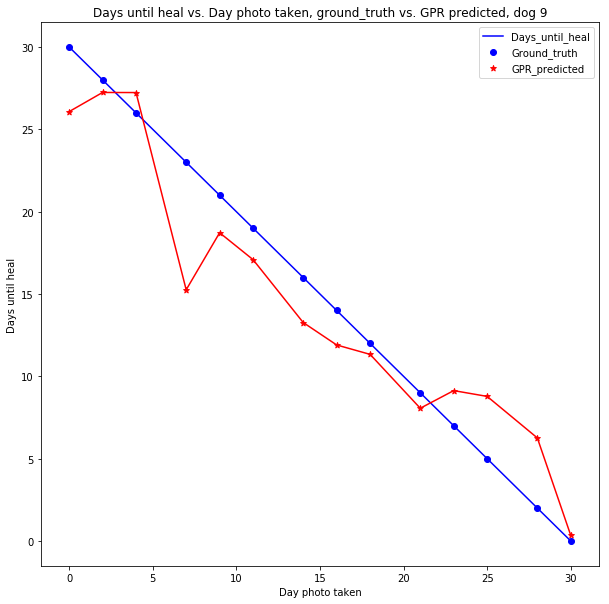

In [72]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


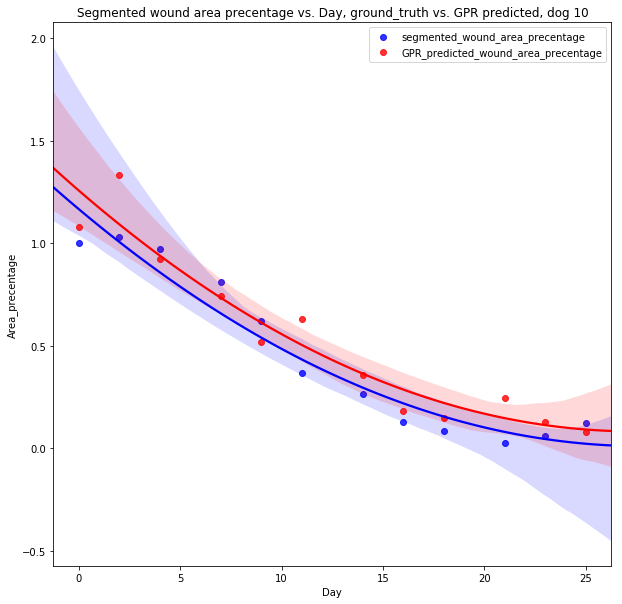

In [47]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

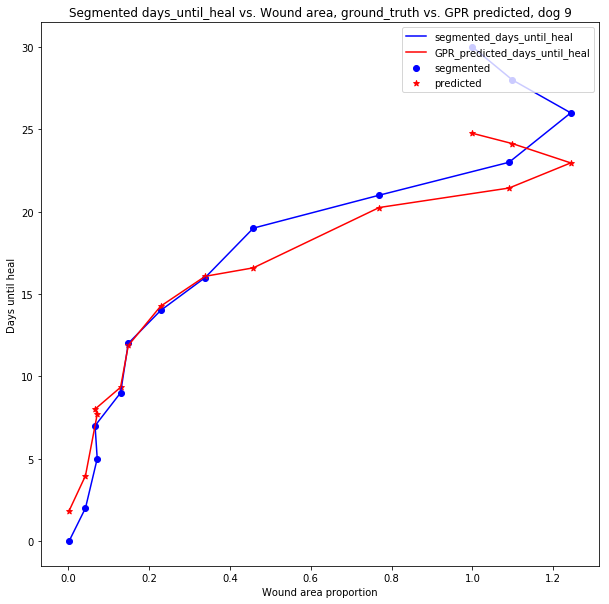

In [12]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

/home/qiwei/anaconda2/envs/tensorflow-image-gpu-test/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


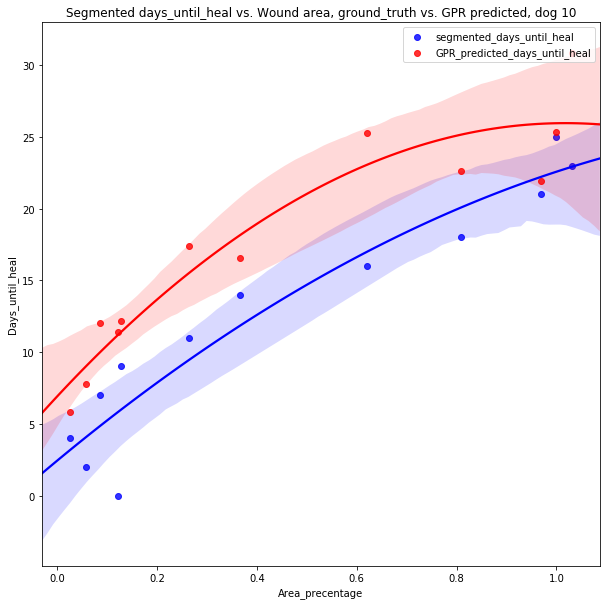

In [24]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

### Part 2 plots
connected line and poly-2 regression line

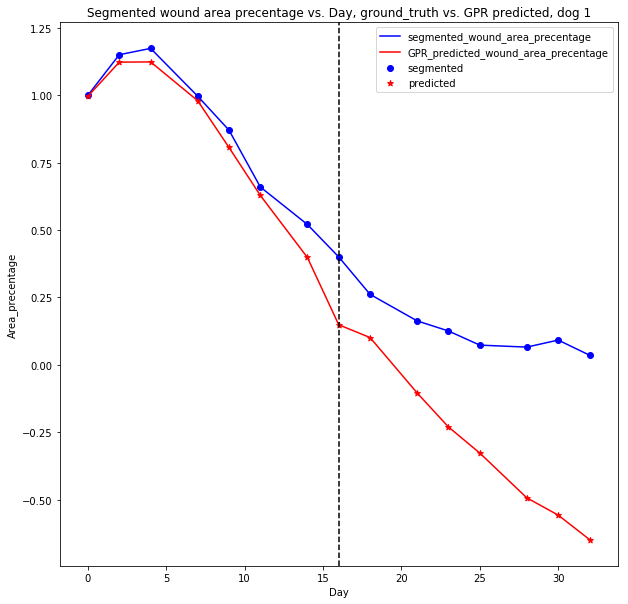

In [90]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

#fig, ax = plt.subplots(figsize=(10,10))

#plt.scatter(x = days_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
#plt.plot(days_seq , Y_test, linestyle='solid',color='blue', label='segmented_wound_area_precentage')

#plt.scatter(x = days_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
#plt.plot(days_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_wound_area_precentage')

#plt.axvline(x = 16, linestyle = '--', c = 'black')

#plt.title("Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}".format(test_num))
#plt.xlabel("Day")
#plt.ylabel("Area_precentage")
#ax.legend(loc='upper right')
#plt.show()

#fig.tight_layout()
#fig.savefig(fig_path + "(Train on < 16 days' all wound sequences)ground_truth vs. GPR predicted, dog {}, connected_lines.png".format(test_num))